# Time series clustering

`tslearn` provides a `clustering` package that provides a kernel $k$-means implementation based on Global Alignment kernel.

In [1]:
%pylab inline
import numpy
import sys
sys.path.append("../../../")  # Add tslearn base directory to Python path

from tslearn.clustering import GlobalAlignmentKernelKMeans
from tslearn.metrics import sigma_gak, cdist_gak
from tslearn.generators import random_walk_blobs

numpy.random.seed(0)
X, y = random_walk_blobs(n_ts_per_blob=50, sz=128, d=1, n_blobs=3)

Populating the interactive namespace from numpy and matplotlib


First, as `GlobalAlignmentKernelKMeans` relies on Global Alignment kernel, one needs to select an appropriate value for the bandwidth parameter $\sigma$ to be used in the kernel. 
This can be done using the `sigma_gak` function from `tslearn.metrics` module:

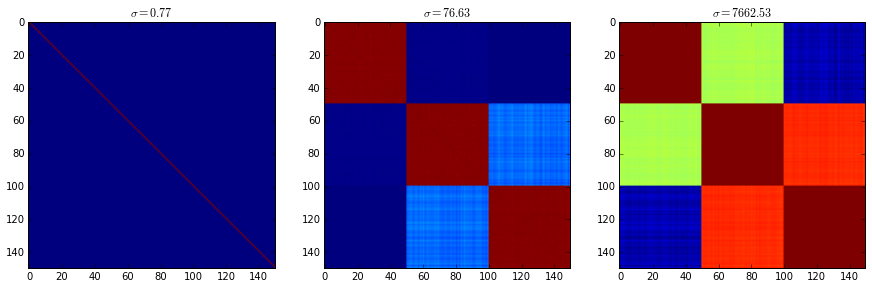

In [2]:
sigma = sigma_gak(X)

pylab.figure(figsize=(15, 5))
for i, sigma in enumerate([sigma / 100, sigma, 100 * sigma]):
    pylab.subplot(1, 3, i + 1)
    pylab.imshow(cdist_gak(X, sigma=sigma))
    pylab.title("$\sigma = %.2f$" % sigma)
pylab.show();

As seen above, the value selected by `sigma_gak` (which corresponds to the middle Gram matrix) tends to pick reasonable values for the bandwidth parameter.

Now, we can fit a kernel $k$-means and observe the resulting clustering of the data.

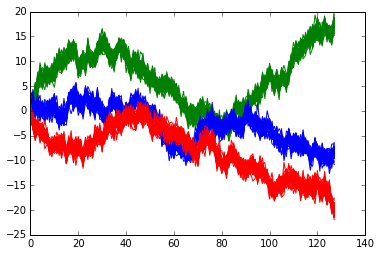

In [3]:
gak_km = GlobalAlignmentKernelKMeans(n_clusters=3, sigma=sigma, n_init=5)
y_pred = gak_km.fit_predict(X)

if gak_km.X_fit_ is not None:
    own_colors = ["r", "g", "b"]
    pylab.figure()
    for xx, yy in zip(X, y_pred):
        pylab.plot(numpy.arange(128), xx, own_colors[yy] + "-")
    pylab.show()